# ProstMorph
MRI/US fusion using VoxelMorph

In [1]:
from notebooks.setup import train_generator, validation_generator, config, model, callbacks, latest_checkpoint

Instructions for updating:
Use fn_output_signature instead
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


vxm info: mutual information loss is experimental


In [2]:
# model.summary(line_length=160)
# model.outputs

### Train network

In [2]:
if latest_checkpoint is not None:
    model.load_weights(latest_checkpoint)

In [3]:
config["base_dir"].mkdir(exist_ok=True)
hist = model.fit(
    train_generator, validation_data=validation_generator,
    epochs=config['epochs'], steps_per_epoch=config['steps_per_epoch'], initial_epoch=config['initial_epoch'],
    callbacks=callbacks,
    verbose=2
)

Epoch 151/300
100/100 - 421s - loss: -2.6515e+00 - transformer_loss: -4.0422e-02 - flow_resize_loss: 0.0382 - seg_transformer_loss: -8.8308e-01 - transformer_mi: 0.0404 - seg_transformer_dice: 0.8831 - val_loss: -2.6725e+00 - val_transformer_loss: -4.4601e-02 - val_flow_resize_loss: 0.0413 - val_seg_transformer_loss: -8.8971e-01 - val_transformer_mi: 0.0446 - val_seg_transformer_dice: 0.8897

Epoch 00151: val_loss improved from inf to -2.67247, saving model to ..\models\test_1.0_3.0_final\checkpoints\best_weights_0151.ckpt
Epoch 152/300
100/100 - 366s - loss: -2.6802e+00 - transformer_loss: -4.3892e-02 - flow_resize_loss: 0.0371 - seg_transformer_loss: -8.9114e-01 - transformer_mi: 0.0439 - seg_transformer_dice: 0.8911 - val_loss: -2.6652e+00 - val_transformer_loss: -4.4452e-02 - val_flow_resize_loss: 0.0407 - val_seg_transformer_loss: -8.8713e-01 - val_transformer_mi: 0.0445 - val_seg_transformer_dice: 0.8871

Epoch 00152: val_loss did not improve from -2.67247
Epoch 153/300
100/100 -

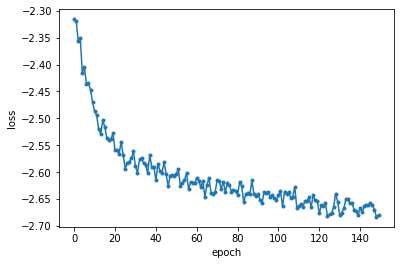

In [5]:
import matplotlib.pyplot as plt

def plot_history(hist, loss_name='loss'):
    # Simple function to plot training history.
    plt.figure()
    plt.plot(hist.epoch, hist.history[loss_name], '.-')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

plot_history(hist)